#Regresión lineal al datset load_boston

##Librerías necesarias

In [1]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

##Cargamos los datos de la biblioteca scikit-learn

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

##Datos que tiene el dataset

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])




*   datos/data: contiene la información de varias casas
*   feature_names: nombres de las características
*   DESCR: describe el conjunto de datos
*   **objetivo/traget: los precios de la casa (caracterista más relevante)**







##Caracteristicas de los datos

In [5]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

* CRIM: Tasa de delincuencia per cápita por ciudad
* ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
* INDUS: Proporción de acres comerciales no minoristas por ciudad
* CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
* NOX: concentración de óxido nítrico (partes por 10 millones)
* RM: Número medio de habitaciones por vivienda
* EDAD: Proporción de unidades ocupadas por el propietario construidas antes de 1940
* DIS: distancias ponderadas a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a carreteras radiales
* TAX/IMPUESTO: Tasa de impuesto a la propiedad de valor total por USD 10.000
* PTRATIO: Proporción alumno/profesor por municipio
* B: 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
* LSTAT: porcentaje de la población de menor estatus
* MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 (REVISAR)



##Creamos una tabla de datos usando pandas

In [6]:
#creamos una tabla (tipo excel con PANDAS, con titulos para faciliar la manipulación)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head(10)   #imprimimos las primeras 10 filas


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


##Conociendo los datos

In [7]:
#Cuantos registros tiene el dataset (rows)
#boston.shape[1]
#boston.index
#Cuántos datos tiene cada registro (columns)
#boston.shape[1]
#Hay datos nulos (null) en el dataset?
boston.isnull().sum()
#boston.isnull().values.any()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##Graficando los valores 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


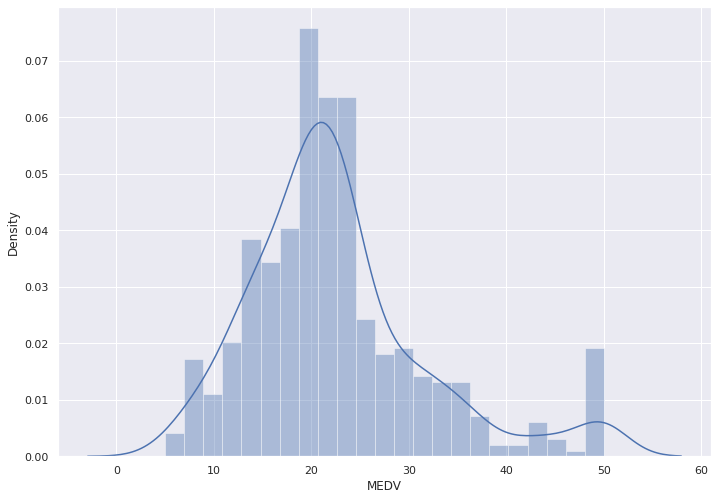

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(boston['MEDV']) #histplot(boston['MEDV']) #agregamos los datos
plt.show()                                  #visualizamos el grafico

##Matriz de correlación

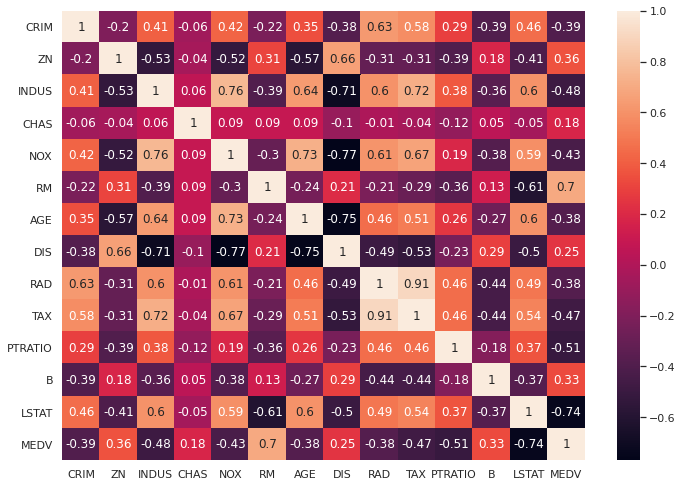

In [12]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = boston.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

##**8. Preparación de los datos para el entrenamiento del modelo**

Regresión lineal:
> Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando X=0)

> Concatenamos las columnas que seleccionamos para entrenar: X = LSTAT y RM Y = MEDV





In [583]:
#Entrenando con una sola variable en X

#X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
#X = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])

#entrenando con dos variables en X
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'],boston['PTRATIO'],boston['INDUS'],boston['TAX'],boston['NOX'],boston['RAD'],boston['CRIM'],boston['AGE'],boston['ZN'],boston['B'],boston['DIS'],boston['CHAS']], columns = ['LSTAT','RM','PTRATIO','INDUS','TAX','NOX','RAD','CRIM','AGE','ZN','B','DIS','CHAS'])
Y = boston['MEDV']

## **9. Dividir los datos en conjuntos de entrenamiento (55%) y pruebas (45%)**

In [584]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.45, random_state=53)
print("x55%: "+str(X_train.shape) +", x45%: "+str(X_test.shape))
print("y55%: "+str(Y_train.shape) +", y45%: "+str(Y_test.shape))

x55%: (278, 13), x45%: (228, 13)
y55%: (278,), y45%: (228,)


## **10.entrenando un modelo de regresión lineal**

In [585]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **11.Evaluación del modelo**

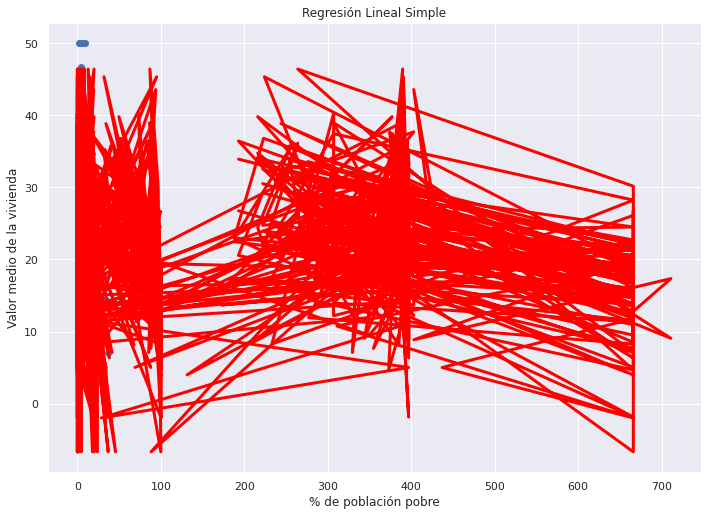


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.801617446310859


In [586]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['LSTAT'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [578]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 4.233379811871676
R2 resultado es 0.8010513514262522


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 5.432629364249234
R2 resultado es 0.6159354437242047
